In [21]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [25]:
zip = gpd.read_file('../data/zipcodes.geojson')

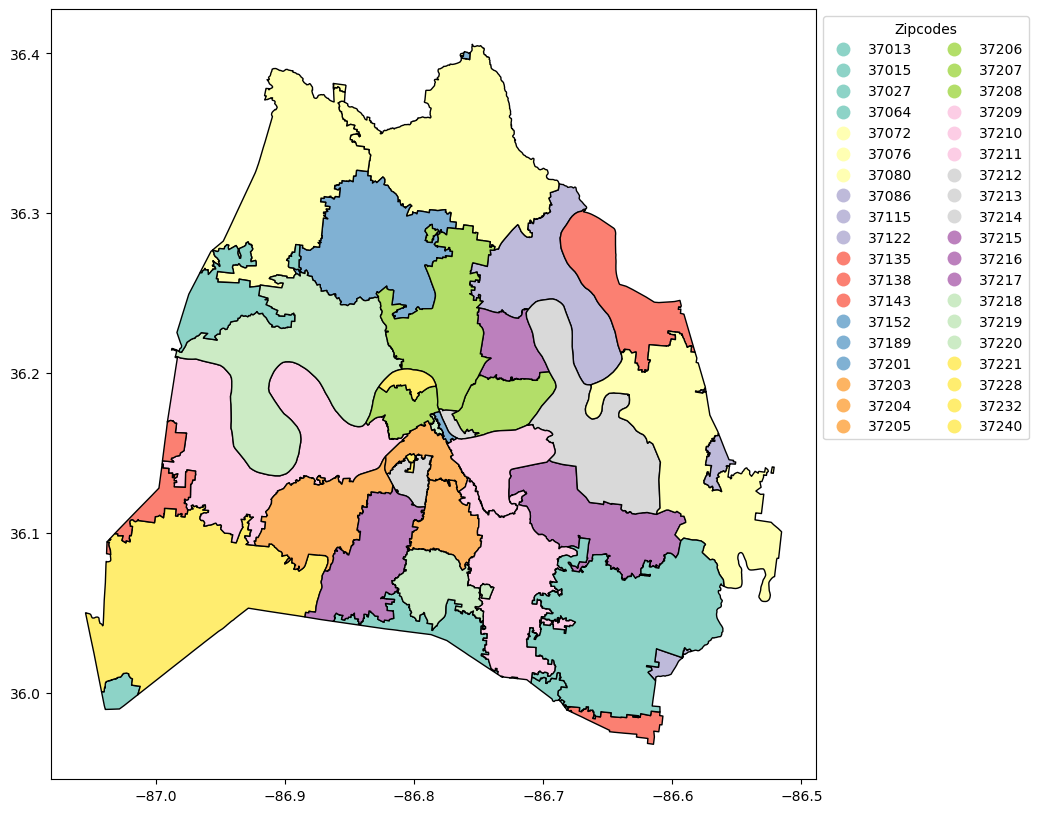

In [40]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}

zip.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show();

In [33]:
nash_zip = zip.loc[zip['po_name'] == 'NASHVILLE']
nash_zip.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
1,2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
2,7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
3,9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."
4,12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456,"MULTIPOLYGON (((-86.97543 36.20877, -86.97221 ..."
5,13,37206,2,NASHVILLE,75782.862116030214,221537063.58166504,"MULTIPOLYGON (((-86.75348 36.16274, -86.75383 ..."
6,17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168,"MULTIPOLYGON (((-86.67355 36.12729, -86.66687 ..."
7,19,37207,49,NASHVILLE,14456.130686344946,6987521.0933837891,"MULTIPOLYGON (((-86.78596 36.29097, -86.78595 ..."
8,24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."
9,27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."


In [43]:
project = zip.iloc[[0,1,2,7,8,9,12,13,15,17,18,19,22,24,26,27,28,31,32,35,36,37,40,42,44,45,46,47,49,53]]
project.sort_values('zip')

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
26,37072,46,GOODLETTSVILLE,2648.6850248323294,416047.455078125,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
46,37076,53,HERMITAGE,291751.42832600401,983805973.83410645,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
28,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
22,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
18,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."


<Axes: >

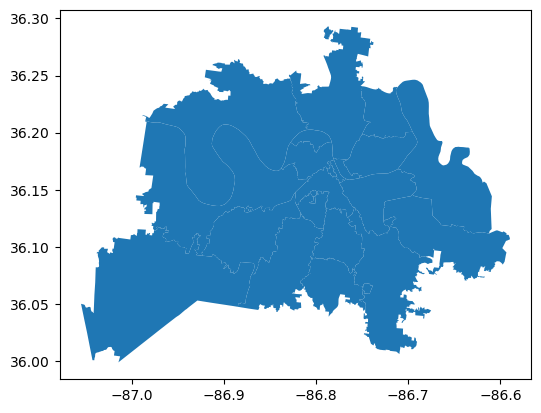

In [34]:
nash_zip.plot()

In [37]:
nash_not = zip.loc[zip['po_name'] != 'NASHVILLE']
nash_not.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
2,4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
3,5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
4,6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
5,8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
6,10,37135,7,NOLENSVILLE,69742.56063023665,74707266.403198242,"MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ..."
7,11,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ..."
8,14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ..."
9,15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."


<Axes: >

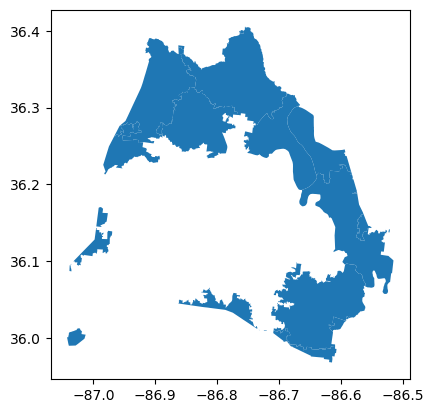

In [38]:
nash_not.plot()

In [45]:
project = project.sort_values('zip')

In [49]:
project = project.reset_index(drop=True)

<Axes: >

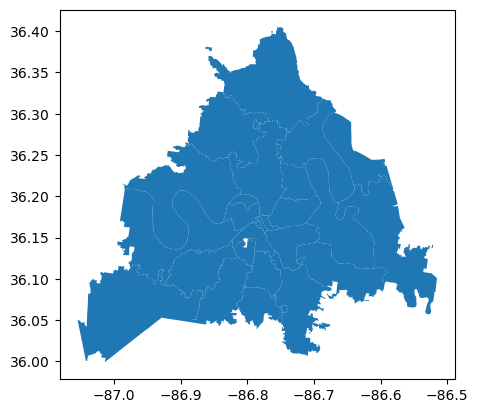

In [51]:
project.plot()


In [52]:
project


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37072,46,GOODLETTSVILLE,2648.6850248323294,416047.455078125,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
1,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."
2,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
3,37076,53,HERMITAGE,291751.42832600401,983805973.83410645,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
4,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
5,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
6,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
7,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
8,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
9,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
